In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Case studies II

## Case study 4 : Classifying whiskies

### Getting started with pandas

Pandas has two data structures
-  Series
-  Dataframe

Lets start with Series

In [115]:
import pandas as pd

x = pd.Series([6,3,8,6])
x

0    6
1    3
2    8
3    6
dtype: int64

Lets specify index explicitly

In [116]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
x

q    6
w    3
e    8
r    6
dtype: int64

Now we can access the series like a numpy array !

In [117]:
x["w"]
x[["w","r"]]

3

w    3
r    6
dtype: int64

Series can also be constructed by passing a dictionary !

In [118]:
age = {"ram":24, "sita":22, "laxman": 19, "ravan":35}
x = pd.Series(age)
x # keys are index and values are value objects of the series

laxman    19
ram       24
ravan     35
sita      22
dtype: int64

Moving on to dataframe, which like series cana also be constructed in multiple ways. Lets construct a dataframe by passing a dictionary

In [119]:
data = {'name' : ['Time','Jim','Pam','Same'],
        'age': [24,56,34,22],
        'zip' : ['23452','35532','46435','54357']}
data

x = pd.DataFrame(data,columns=["name","age","zip"])
x

{'age': [24, 56, 34, 22],
 'name': ['Time', 'Jim', 'Pam', 'Same'],
 'zip': ['23452', '35532', '46435', '54357']}

,name,age,zip
0,Time,24,23452
1,Jim,56,35532
2,Pam,34,46435
3,Same,22,54357


In [120]:
y = pd.DataFrame(data,columns=["name","age","zip"]).set_index('name', drop=False)
y

y = pd.DataFrame(data,columns=["name","age","zip"]).set_index('name', drop=True)
y

,name,age,zip
name,,,
Time,Time,24,23452
Jim,Jim,56,35532
Pam,Pam,34,46435
Same,Same,22,54357


,age,zip
name,,
Time,24,23452
Jim,56,35532
Pam,34,46435
Same,22,54357


Retrieving information from df

In [121]:
x["name"] # colum
x.name # attribute

0    Time
1     Jim
2     Pam
3    Same
Name: name, dtype: object

0    Time
1     Jim
2     Pam
3    Same
Name: name, dtype: object

Re-ordering or re-indexing 

In [122]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
x
x.index
sorted(x.index) # sorted alphabetically
x.reindex(sorted(x.index))

q    6
w    3
e    8
r    6
dtype: int64

Index(['q', 'w', 'e', 'r'], dtype='object')

['e', 'q', 'r', 'w']

e    8
q    6
r    6
w    3
dtype: int64

Both series and df's support arithmetic operations (e.g. addition), where the operations are done by index (e.g. objects with the same index will be added). If indexes don't match however, pandas will introduct a `NaN` object

In [123]:
x = pd.Series([6,3,8,6], index=["q","w","e","r"])
y = pd.Series([7,3,5,2], index=["e","q","r","t"])
x
y
x+y


q    6
w    3
e    8
r    6
dtype: int64

e    7
q    3
r    5
t    2
dtype: int64

e    15.0
q     9.0
r    11.0
t     NaN
w     NaN
dtype: float64

In [124]:
import pandas as pd
import numpy as np

whisky = pd.read_csv("files/whiskies.txt")
whisky["region"] = pd.read_csv("files/regions.txt")

whisky.head()
whisky.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


In [125]:
whisky.iloc[0:10]
whisky.iloc[5:10,0:5]

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands
5,6,ArranIsleOf,2,3,1,1,0,1,1,1,0,1,1,2,KA27 8HJ,194050,649950,Islands
6,7,Auchentoshan,0,2,0,0,0,1,1,0,2,2,3,3,G81 4SJ,247670,672610,Lowlands
7,8,Auchroisk,2,3,1,0,0,2,1,2,2,2,2,1,\tAB55 3XS,340754,848623,Speyside
8,9,Aultmore,2,2,1,0,0,1,0,0,2,2,2,2,\tAB55 3QY,340754,848623,Speyside
9,10,Balblair,2,3,2,1,0,0,2,0,2,1,2,1,\tIV19 1LB,270820,885770,Highlands


,RowID,Distillery,Body,Sweetness,Smoky
5,6,ArranIsleOf,2,3,1
6,7,Auchentoshan,0,2,0
7,8,Auchroisk,2,3,1
8,9,Aultmore,2,2,1
9,10,Balblair,2,3,2


### subsetting columns by index or name

In [126]:
whisky.columns
flavors = whisky.iloc[:,2:14]
flavors.head()

flavors = whisky.loc[:,'Body':'Floral']
flavors.head()

Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'region'],
      dtype='object')

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


### Exploring Correlations

Any whiskies that score on say sweetness also score high on honey attribute

In [127]:
corr_flavors = pd.DataFrame.corr(flavors)
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


Visualizing this correlation might give a better idea

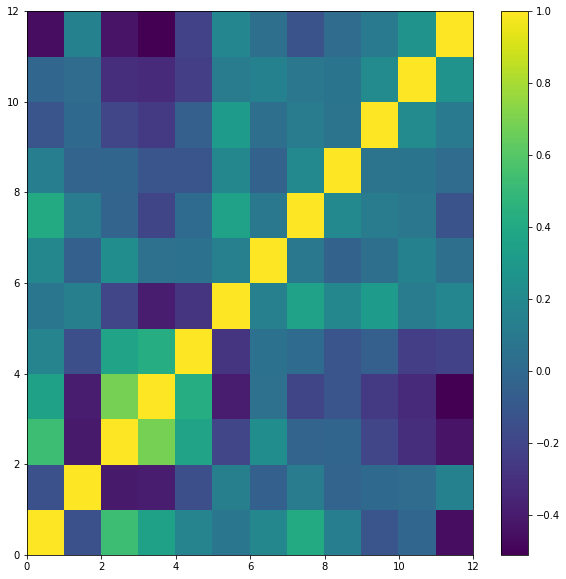

In [128]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 10))
plt.pcolor(corr_flavors)
plt.colorbar();

Clearly, correlation of any dimension with itself is exactly plus 1, but other strong correlations exist too.Heavy body is associated with smokiness. In contrast, it seems that a floral flavor is the opposite of full body or medicinal notes.

Correlation of whiskies across flavors

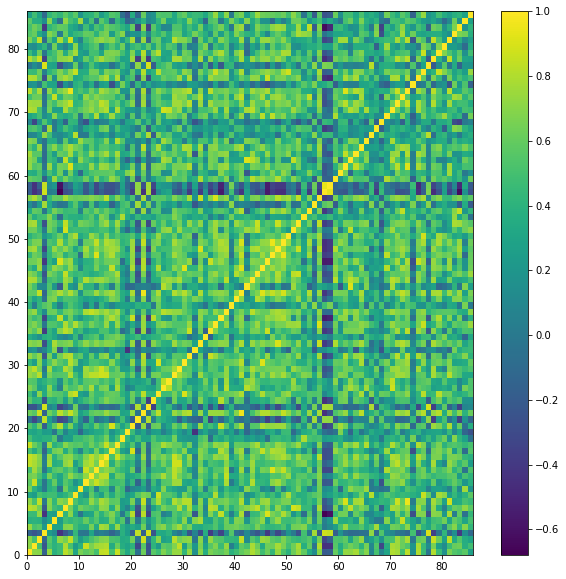

In [129]:
corr_whisky = pd.DataFrame.corr(flavors.transpose())
fig=plt.figure(figsize=(10, 10))
plt.pcolor(corr_whisky)
plt.colorbar();

The axes of plot in my case look fine. In the instructor's plot, there was whitespace included in the plot, because the axes were 90 x 90, with blank area where no data was available. In such a case, a short-cut way to make sure the axes don't extend beyond the data, use

`plt.axis("tight")`

#### Clustering

Clustering whiskies by flavor profile


In [130]:
from sklearn.cluster.bicluster import SpectralCoclustering

# number of regions
print("number of regions i.e. clusters = ",len((whisky["region"]).unique()) )
#len((whisky["region"]).unique()) # 6
model = SpectralCoclustering(n_clusters = 6, random_state=0)
model.fit(corr_whisky)

number of regions i.e. clusters =  6


SpectralCoclustering(init='k-means++', mini_batch=False, n_clusters=6,
           n_init=10, n_jobs=1, n_svd_vecs=None, random_state=0,
           svd_method='randomized')

Lets look at the clusters.

The output is an array with the following dimensions-- number of row clusters times number of rows in the data matrix, the correlation matrix, in this case.

In [131]:
model.rows_

array([[False, False, False, False, False,  True, False, False, False,
        False, False,  True, False,  True, False, False,  True, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False,  True, False,  True, False, False, False, False,
         True, False,  True,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False, False,  True,
        False, False,  True, False,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  Tru

The entries of the array are either true or false. Each row in this array identifies a cluster, here ranging from 0 to 5, and each column identifies a row in the correlation matrix,here ranging from 0 to 85. If we sum all of the columns of this array, we can find out how many observations belong to each cluster.


In [132]:
np.sum(model.rows_, axis=1)

array([20,  5, 19, 17,  6, 19])

If instead we sum all of the rows, we can find out how many clusters belong to each observation. Because each observation belongs in just one of the six clusters, the answer should be 1 for all of them.


In [133]:
np.sum(model.rows_, axis=0)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [134]:
model.row_labels_

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3, 2, 0, 5, 0, 5, 5, 0, 5, 0, 1, 3, 4, 3,
       4, 3, 3, 2, 2, 3, 2, 3, 5, 0, 0, 0, 5, 2, 3, 0, 1, 0, 3, 2, 2, 2, 0,
       5, 0, 0, 3, 3, 2, 2, 2, 0, 1, 5, 4, 4, 0, 3, 5, 2, 5, 5, 2, 1, 5, 1,
       0, 2, 5, 0, 5, 2, 5, 3, 4, 5, 3, 0, 3, 2, 0, 2, 0], dtype=int32)

Observation number 0 belongs to cluster number 5, observation number 1 belongs to cluster number 2, and so on. All of the entries in the array have to be numbers between 0 and 5 because we specified 6 clusters.

#### Comparing correlation matrices

In [135]:
whisky['Group'] = pd.Series(model.row_labels_, index= whisky.index) # add column Group to our whiskey table using the model row labels and explicitly define the index
whisky.head()
whisky = whisky.iloc[np.argsort(model.row_labels_)] # re-order the rows in increasing order by row labels
whisky.head()
whisky = whisky.reset_index(drop=True)
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region,Group
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,5
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside,2
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands,3
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,4
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands,5


,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region,Group
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
33,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
32,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
40,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
45,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0


,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,region,Group
0,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands,0
1,34,GlenElgin,2,3,1,0,0,2,1,1,1,1,2,3,IV30 3SL,322640,861040,Speyside,0
2,33,GlenDeveronMacduff,2,3,1,1,1,1,1,2,0,2,0,1,AB4 3JT,372120,860400,Speyside,0
3,41,GlenSpey,1,3,1,0,0,0,1,1,1,2,0,2,AB38 7AU,327760,849140,Speyside,0
4,46,Glenfiddich,1,3,1,0,0,0,0,0,0,2,2,2,AB55 4DH,332680,840840,Speyside,0


In [136]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

Text(0.5,1,'Original')

(0.0, 86.0, 0.0, 86.0)

Text(0.5,1,'Rearranged')

(0.0, 86.0, 0.0, 86.0)

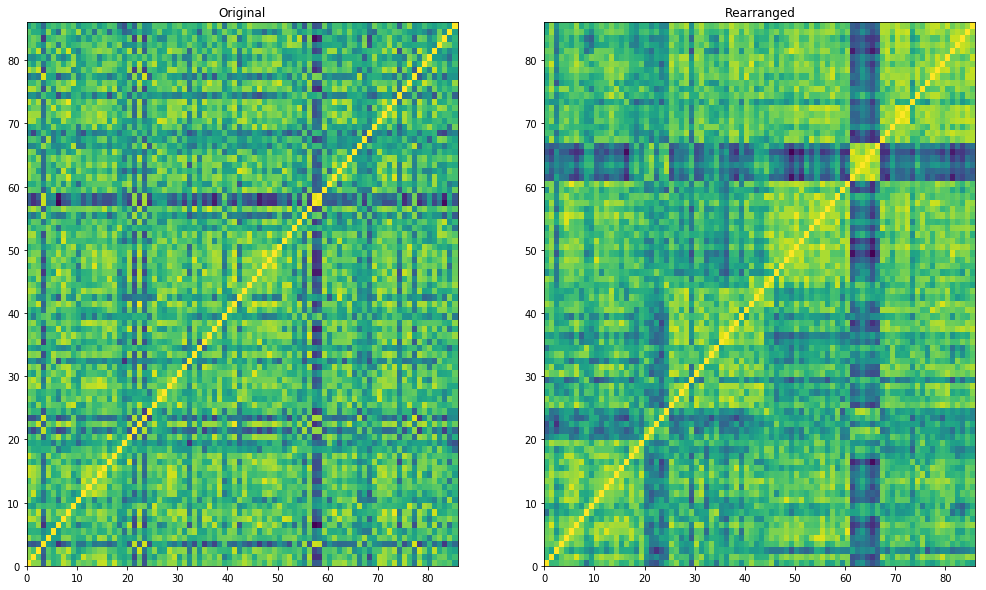

In [137]:
fig=plt.figure(figsize=(17, 10))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")

In [138]:
import pandas as pd
data = pd.Series([1,2,3,4])
data
data = data.iloc[[3,0,1,2]]
data
data = data.reset_index(drop=True) 
data
data[0]

0    1
1    2
2    3
3    4
dtype: int64

3    4
0    1
1    2
2    3
dtype: int64

0    4
1    1
2    2
3    3
dtype: int64

4

# Exercise 1

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

In this exercise, we provide a basic demonstration of an interactive grid plot using Bokeh. Make sure to study this code now, as we will edit similar code in the exercises that follow.


-  Execute the following code and follow along with the comments. We will later adapt this code to plot the correlations among distillery flavor profiles as well as plot a geographical map of distilleries colored by region and flavor profile.
-  Once you have plotted the code, hover, click, and drag your cursor on the plot to interact with it. Additionally, explore the icons in the top-right corner of the plot for more interactive options!


In [142]:
# First, we import a tool to allow text to pop up on a plot when the cursor
# hovers over it.  Also, we import a data structure used to store arguments
# of what to plot in Bokeh.  Finally, we will use numpy for this section as well!
import bokeh
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, output_file, show

#from bokeh.transform import jitter
import numpy as np

output_notebook()
# Let's plot a simple 5x5 grid of squares, alternating in color as red and blue.

plot_values = [1,2,3,4,5]
plot_colors = ["red", "blue"]

# How do we tell Bokeh to plot each point in a grid?  Let's use a function that
# finds each combination of values from 1-5.
from itertools import product

grid = list(product(plot_values, plot_values))
print(grid)

# The first value is the x coordinate, and the second value is the y coordinate.
# Let's store these in separate lists.

xs, ys = zip(*grid)
print(xs)
print(ys)

# Now we will make a list of colors, alternating between red and blue.

colors = [plot_colors[i%2] for i in range(len(grid))]
print(colors)

# Finally, let's determine the strength of transparency (alpha) for each point,
# where 0 is completely transparent.

alphas = np.linspace(0, 1, len(grid))

# Bokeh likes each of these to be stored in a special dataframe, called
# ColumnDataSource.  Let's store our coordinates, colors, and alpha values.

source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
        "alphas": alphas,
    }
)
# We are ready to make our interactive Bokeh plot!

#output_file("Basic_Example.html", title="Basic Example")
fig = figure(tools="reset, hover, save")
fig.rect("x", "y", 0.9, 0.9, source=source, color="colors",alpha="alphas")
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Value": "@x, @y",
    }
show(fig)

Loading BokehJS ...

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
(1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5)
(1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5)
['red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'red']


GlyphRenderer(id='6ccf9286-731f-432b-b96b-e600e7fae274', ...)

#Exercise 2

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

In this exercise, we will create the names and colors we will use to plot the correlation matrix of whisky flavors. Later, we will also use these colors to plot each distillery geographically.


    Create a dictionary region_colors with regions as keys and cluster_colors as values.
    Print region_colors.


In [ ]:
cluster_colors = ["red", "orange", "green", "blue", "purple", "gray"]
regions = ["Speyside", "Highlands", "Lowlands", "Islands", "Campbelltown", "Islay"]
region_colors = dict(zip(regions, cluster_colors))

print(region_colors)

#Exercise 3

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

correlations is a two-dimensional np.array with both rows and columns corresponding to distilleries and elements corresponding to the flavor correlation of each row/column pair. In this exercise, we will define a list correlation_colors, with string values corresponding to colors to be used to plot each distillery pair. Low correlations among distillery pairs will be white, high correlations will be a distinct group color if the distilleries from the same group, and gray otherwise.


    Edit the code to define correlation_colors for each distillery pair to have input 'white' if their correlation is less than 0.7.
    whisky is a pandas dataframe, and Group is a column consisting of distillery group memberships. For distillery pairs with correlation greater than 0.7, if they share the same whisky group, use the corresponding color from cluster_colors. Otherwise, the correlation_colors value for that distillery pair will be defined as 'lightgray'.


In [ ]:
distilleries = list(whisky.Distillery)
correlation_colors = []
for i in range(len(distilleries)):
    for j in range(len(distilleries)):
        if  correlations[i,j] < 0.7: # if low correlation
            correlation_colors.append('white')         # just use white.
        else:                                          # otherwise,
            if whisky.Group[i] == whisky.Group[j]:  # if the groups match,
                correlation_colors.append(cluster_colors[whisky.Group[i]]) # color them by their mutual group.
            else:                                      # otherwise
                correlation_colors.append('lightgray') # color them lightgray.

# Exercise 4

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

In this exercise, we will edit the given code to make an interactive grid of the correlations among distillery pairs based on the quantities found in previous exercises. Most plotting specifications are made by editing ColumnDataSource, a bokeh structure used for defining interactive plotting inputs. The rest of the plotting code is already complete.


    correlation_colors is a list of string colors for each pair of distilleries. Set this as color in ColumnDataSource.
    Define correlations in source using correlations from the previous exercise. To convert correlations from a np.array to a list, use the flatten() method. This correlation coefficient will be used to define both the color transparency as well as the hover text for each square.


In [ ]:
source = ColumnDataSource(
    data = {
        "x": np.repeat(distilleries,len(distilleries)),
        "y": list(distilleries)*len(distilleries),
        "colors": correlation_colors,
        "correlations": correlations.flatten(),
    }
)

output_file("Whisky Correlations.html", title="Whisky Correlations")
fig = figure(title="Whisky Correlations",
    x_axis_location="above", tools="resize,hover,save",
    x_range=list(reversed(distilleries)), y_range=distilleries)
fig.grid.grid_line_color = None
fig.axis.axis_line_color = None
fig.axis.major_tick_line_color = None
fig.axis.major_label_text_font_size = "5pt"
fig.xaxis.major_label_orientation = np.pi / 3

fig.rect('x', 'y', .9, .9, source=source,
     color='colors', alpha='correlations')
hover = fig.select(dict(type=HoverTool))
hover.tooltips = {
    "Whiskies": "@x, @y",
    "Correlation": "@correlations",
}
show(fig)

#Exercise 5

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

In this exercise, we give a demonstration of plotting geographic points.

Run the following code, to be adapted in the next section. Compare this code to that used in plotting the distillery correlations.

In [ ]:
points = [(0,0), (1,2), (3,1)]
xs, ys = zip(*points)
colors = ["red", "blue", "green"]

output_file("Spatial_Example.html", title="Regional Example")
location_source = ColumnDataSource(
    data={
        "x": xs,
        "y": ys,
        "colors": colors,
    }
)

fig = figure(title = "Title",
    x_axis_location = "above", tools="resize, hover, save")
fig.plot_width  = 300
fig.plot_height = 380
fig.circle("x", "y", 10, 10, size=10, source=location_source,
     color='colors', line_color = None)

hover = fig.select(dict(type = HoverTool))
hover.tooltips = {
    "Location": "(@x, @y)"
}
show(fig)

In [ ]:
region_cols = [region_colors[reg] for reg in whisky["Region"]]
#whisky.Group.unique()

whisky['GroupCols'] = 'col'
whisky['GroupCols'][whisky['Group'] == 0] = 'red'
whisky['GroupCols'][whisky['Group'] == 1] = 'orange'
whisky['GroupCols'][whisky['Group'] == 2] = 'green'
whisky['GroupCols'][whisky['Group'] == 3] = 'blue'
whisky['GroupCols'][whisky['Group'] == 4] = 'purple'
whisky['GroupCols'][whisky['Group'] == 5] = 'gray'
classification_cols = whisky.GroupCols

location_plot("Whisky Locations and Regions", region_cols)
location_plot("Whisky Locations and Groups", classification_cols)

In [ ]:
def location_plot(title, colors):

    output_file(title+".html")
    location_source = ColumnDataSource(
        data={
            "x": whisky[" Latitude"],
            "y": whisky[" Longitude"],
            "colors": colors,
            "regions": whisky.Region,
            "distilleries": whisky.Distillery
        }
    )
    
    fig = figure(title = title,
        x_axis_location = "above", tools="resize, hover, save")
    fig.plot_width  = 400
    fig.plot_height = 500
    fig.circle("x", "y", 10, 10, size=9, source=location_source,
         color='colors', line_color = None)
    fig.xaxis.major_label_orientation = np.pi / 3
    hover = fig.select(dict(type = HoverTool))
    hover.tooltips = {
        "Distillery": "@distilleries",
        "Location": "(@x, @y)"
    }
    show(fig)
region_cols = [region_colors[reg] for reg in whisky["Region"]]
location_plot("Whisky Locations and Regions", region_cols)



# Exercise 6

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

In this exercise, we will define a function location_plot(title, colors) that takes a string title and a list of colors corresponding to each distillery and outputs a Bokeh plot of each distillery by latitude and longitude. It will also display the distillery name, latitude, and longitude as hover text.


    Adapt the given code beginning with the first comment and ending with show(fig) to create the function location_plot(), as described above.
    Region is a column of in the pandas dataframe whisky, containing the regional group membership for each distillery. Make a list consisting of the value of region_colors for each distillery, and store this list as region_cols.
    Use location_plot to plot each distillery, colored by its regional grouping.


# Exercise 7

In this case study, we have prepared step-by-step instructions for you on how to prepare plots in Bokeh, a library designed for simple and interactive plotting. We will demonstrate Bokeh by continuing the analysis of Scotch whiskies.

location_plot remains stored from the previous exercise. In this exercise, we will use this function to plot each distillery, colored by region and taste coclustering classification, respectively.


    Create the list region_cols consisting of the color in region_colors that corresponds to each whisky in whisky.Region.
    Similarly, create a list classification_cols consisting of the color in cluster_colors that corresponds to each cluster membership in whisky.Group.
    Create two interactive plots of distilleries, one using region_cols and the other with colors defined by called classification_cols. How well do the coclustering groupings match the regional groupings?


 We see that there is not very much overlap between the regional classifications and the coclustering classifications. This means that regional classifications are not a very good guide to Scotch whisky flavor profiles. 

## Case Study 5: Bird Migration 


In [1]:
import pandas as pd
birdata = pd.read_csv("files/bird_tracking.csv")
birdata.info()
birdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


For starters, lets plot trajectory of one bird without any cartographic projections

In [2]:
import numpy as np
ix = birdata.bird_name == "Eric"
x,y = birdata.longitude[ix], birdata.latitude[ix]

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(x,y,".")

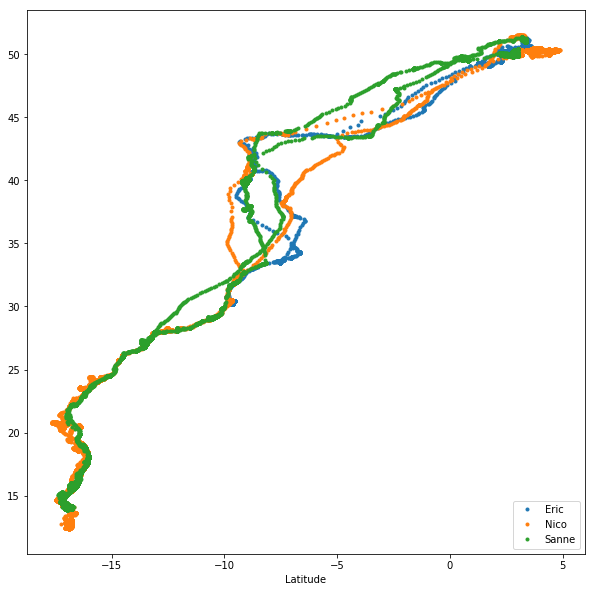

In [4]:
bird_names = pd.unique(birdata.bird_name)
bird_names
plt.figure(figsize=(10, 10))
for bird_name in bird_names:
    ix = birdata.bird_name == bird_name
    x,y = birdata.longitude[ix], birdata.latitude[ix]
    plt.plot(x,y,".", label=bird_name)
plt.xlabel("Longitude")
plt.xlabel("Latitude")
plt.legend(loc="lower right")

ValueError: max must be larger than min in range parameter.

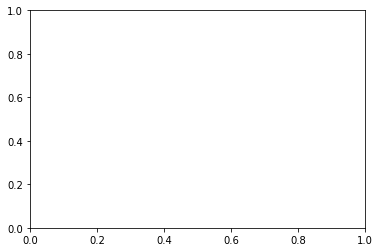

In [5]:
birdata.columns
ix = birdata.bird_name == "Eric"
speed = birdata.speed_2d[ix]
plt.hist(speed)

Hmm... lets debug the error message

In [6]:
speed[:10]

0    0.150000
1    2.438360
2    0.596657
3    0.310161
4    0.193132
5    2.904772
6    3.080584
7    2.199659
8    2.640076
9    4.592211
Name: speed_2d, dtype: float64

(array([3., 1., 0., 0., 1., 2., 2., 0., 0., 1.]),
 array([0.15      , 0.59422108, 1.03844216, 1.48266324, 1.92688432,
        2.3711054 , 2.81532648, 3.25954756, 3.70376864, 4.14798972,
        4.5922108 ]),
 <a list of 10 Patch objects>)

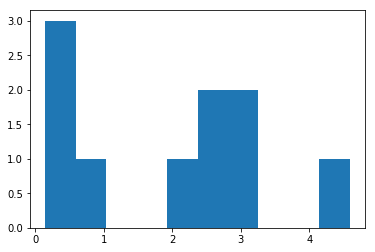

In [7]:
plt.hist(speed[:10])

Looks like the first 10 elements are fine. So there is something in the rest of the array elements that is causing the error

In [8]:
def any(S):
    for x in S:
        if x:
            return x
    return S[-1]

def all(S):
    for x in S:
        if not x:
            return x
    return S[-1]

In [9]:
# determine if any Nan values exist 
any(np.isnan(speed)) # there are some Nan values !
np.isnan(speed).any()

# how many ?
np.sum(np.isnan(speed))

85

Lets remove the nan values and re-plot

In [10]:
idx = np.isnan(speed)
idx[:5]

0    False
1    False
2    False
3    False
4    False
Name: speed_2d, dtype: bool

Now, instead of creating another list with non-nan values from speed, we could use the `bitwise complement` of the `idx`

In [11]:
idx[:5]
len(idx)
~idx[:5] # opposite
len(~idx)

19795

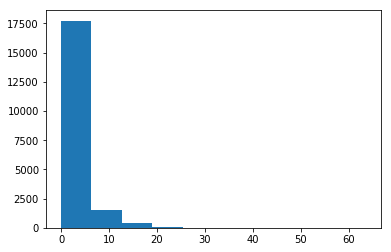

In [12]:
ix = birdata.bird_name == "Eric"
speed = birdata.speed_2d[ix]
idx = np.isnan(speed)
plt.hist(speed[~idx]);

/Users/nsarode/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


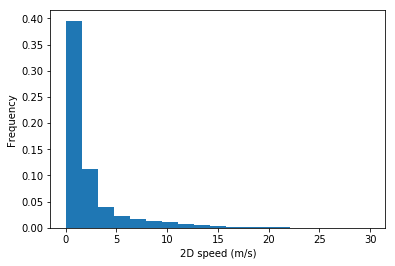

In [13]:
# lets spiff up the plot

speed = birdata.speed_2d[birdata.bird_name == "Eric"]
idx = np.isnan(speed)
plt.hist(speed[~idx], bins=np.linspace(0,30,20), normed=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

Pandas has its own plotting functionality ! It deals with Nan's better, though it is still advisable to examine your data carefully nevertheless

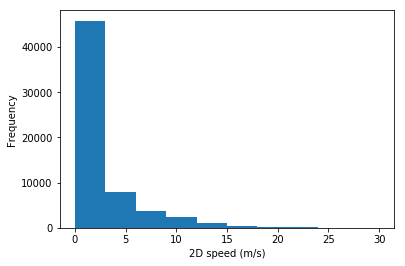

In [14]:
birdata.speed_2d.plot(kind='hist',range=[0,30])
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency");

### Using Datetime

We have a column in our df that has date and time stamps in it. It however is a string object.

In [15]:
birdata.columns
birdata.date_time[:4]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
3    2013-08-15 01:47:51+00
Name: date_time, dtype: object

Datetime function could be useful to convert the column to a datetime object which will in turn allow us to do additional aoperations

In [16]:
import datetime
time_1 = datetime.datetime.today()

In [17]:
time_2 = datetime.datetime.today()
time_2 - time_1

datetime.timedelta(0, 0, 4768)

In [18]:
birdata.date_time[0] # last 3 elements are UTC 
date_str = birdata.date_time[0]
type(date_str)
date_str[:-3]

'2013-08-15 00:18:08'

In [19]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [20]:
timestamps = []
for k in range(len(birdata)):
    timestamps.append(datetime.datetime.strptime\
                      (birdata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

timestamps[:3]

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58)]

In [21]:
birdata["timestamp"] = pd.Series(timestamps, index=birdata.index)
birdata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [22]:
birdata.timestamp[4] - birdata.timestamp[3]

Timedelta('0 days 00:29:51')

To determine the time elapsed since the beginning of data collection

In [23]:
times = birdata.timestamp[birdata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]

elapsed_time[0]
elapsed_time[1000]

Timedelta('12 days 02:02:00')

To get the estimate in hours or mins

In [24]:
elapsed_time[1000] / datetime.timedelta(days=1) # how many days have passed
elapsed_time[1000] / datetime.timedelta(hours=1) # how many hours have passed

290.03333333333336

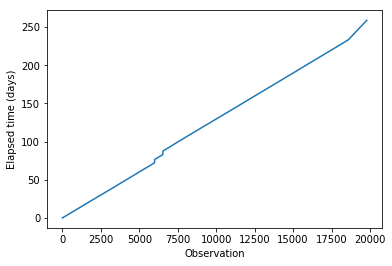

In [25]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)");

If the times that passes between any two consecutive observations was the exact same, for all observations,we would see one perfectly straight line. In this case we see a couple of jumps in our curve.What this indicates to us is that there are observations that are further apart from one another than other observations in the data set. This type of exploration of data really helps you understand your data set very thoroughly.

In [26]:
data = birdata[birdata.bird_name == "Eric"]
times = data.timestamp
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

next_day = 1
inds = []
daily_mean_speed = []
# remember that enumerate returns a tuple of index and value
for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        # computer mean speed
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day +=1
        inds = []
        

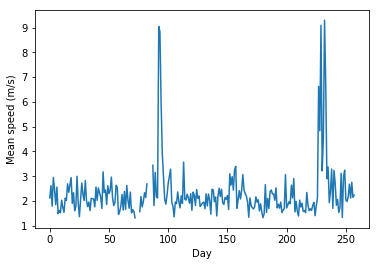

In [27]:
plt.plot(daily_mean_speed)
plt.xlabel("Day")
plt.ylabel("Mean speed (m/s)");

So looking at the plot, we first see that we
have data for approximately 260 days.
On any given typical, or average day, Eric
is flying, on average, about 2 meters per second,
just by eyeballing the figure.
However, we can see that there seemed to be two periods within the observation
window during which Eric is flying substantially more.
These are the periods that correspond to his migration patterns.
We can see that around day, equal to 90 or 95 perhaps,
his mean daily speed is as high as 9 meters per second.
We see a similar peak for day perhaps 230 or so.
Looking at this plot, we've been able to identify when exactly Eric carries out
his migration.
The next step we'd like to accomplish is to find out where he actually
migrates from and where does he end up.

In [28]:
dateTime = birdata.timestamp[birdata.bird_name == "Sanne"]
dateTime[0:4]

40916   2013-08-15 00:01:08
40917   2013-08-15 00:31:00
40918   2013-08-15 01:01:19
40919   2013-08-15 01:31:38
Name: timestamp, dtype: datetime64[ns]

## Cartopy

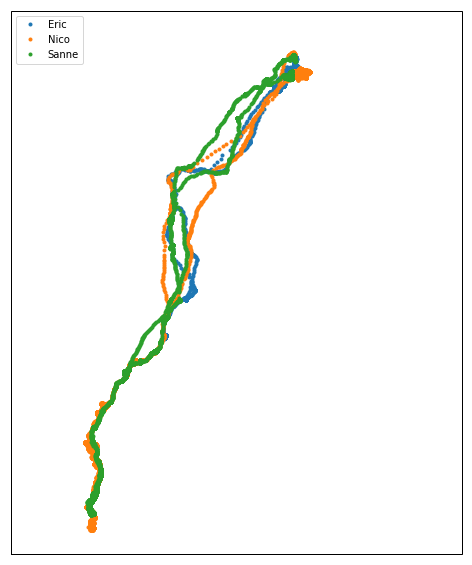

In [33]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))

for name in bird_names:
    ix = birdata['bird_name'] == name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    ax.plot(x, y, '.', transform= ccrs.Geodetic(), label=name)
plt.legend(loc="upper left");

/Users/nsarode/anaconda3/envs/py36/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/nsarode/anaconda3/envs/py36/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/nsarode/anaconda3/envs/py36/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/Users/nsarode/anaconda3/envs/py36/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.forma

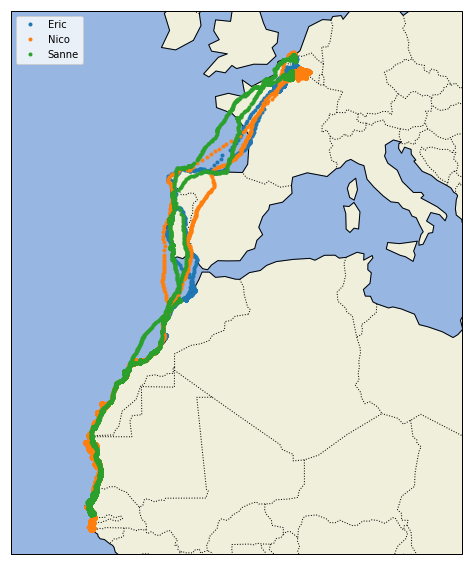

In [34]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0,20.0,52.0,10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
for name in bird_names:
    ix = birdata['bird_name'] == name
    x, y = birdata.longitude[ix], birdata.latitude[ix]
    ax.plot(x, y, '.', transform= ccrs.Geodetic(), label=name)
plt.legend(loc="upper left");
plt.savefig("map.pdf")

Though this plot looks like the one we made before, this is based on actual cartographic information. We can also add geographical features to this plot

**Cartopy library kept crashing the kernel when attempting to plot!!**

Had to execute `conda update --all` , to update the patch for the package `shapely` which was using an outdate `GEOS` version.

In [35]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birdata.groupby('bird_name')
grouped_birds.head()

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds =  grouped_birds['speed_2d'].agg(np.mean)
print(mean_speeds)

# Use the `head()` method prints the first 5 lines of each bird.
grouped_birds.head()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds['altitude'].agg(np.mean)

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64


# Exercise 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.


    Convert birddata.date_time to the pd.datetime format, and store as birddata["date"].
    Fill in the code to find the mean altitudes for each day.


In [36]:
# Convert birddata.date_time to the `pd.datetime` format.
birdata.date_time = pd.to_datetime(birdata['date_time'])
# Create a new column of day of observation
birdata["date"] = birdata['date_time'].dt.date

# Check the head of the column.
birdata.date.head()

# Use `groupby()` to group the data by date.
grouped_bydates = birdata.groupby('date')

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates['altitude'].agg(np.mean)

# Exercise 3

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

birddata already contains the date column. To find the average speed for each bird and day, create a new grouped dataframe called grouped_birdday that groups the data by both bird_name and date.

In [37]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birdata.groupby(['bird_name','date'])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday['altitude'].agg(np.mean)

# look at the head of `mean_altitudes_perday`.
mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

# Exercise 4

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

Great! Now find the average speed for each bird and day.


    Store these are three pandas Series objects – one for each bird.
    Use the plotting code provided to plot the average speeds for each bird.


# Case study 6 : Social network analysis

In [3]:
import networkx as nx

## Add nodes

In [2]:
G = nx.Graph() # empty graph
G.add_node(1) # add one node
G.add_nodes_from([2,3]) # add multiple nodes
G.add_nodes_from(["u","v"]) # nodes can be strings too

NameError: name 'nx' is not defined

In [10]:
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

## Add edges

In [11]:
G.add_edge(1,2) # add edges between nodes
G.add_edge("u","v")
G.add_edges_from([(1,3),(1,4),(1,5),(1,6)]) # python automatically adds non-existent nodes i.e. 4,5 & 6
G.add_edge("u","w")
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

## Remove nodes and edges

In [12]:
G.remove_node(2)
G.nodes()
G.remove_nodes_from([4,5])
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [13]:
G.remove_edge(1,3)
G.edges()
G.remove_edges_from([(1,2),("u","v")])
G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [16]:
G.number_of_nodes()
G.number_of_edges()

6

2

## Visualizing networks

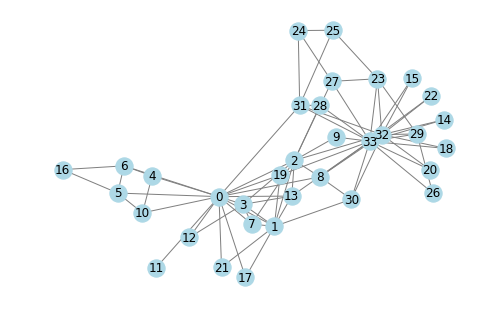

In [18]:
G = nx.karate_club_graph()
nx.draw(G,with_labels=True, node_color="lightblue", edge_color="grey")

Networkx stores the degrees of nodes in a dictionary where
the keys are node IDs and the values are their associated degrees. [Degrees = numbers of neighbor/connected nodes]

In [20]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [21]:
G.degree()[33]

17

In [22]:
G.degree(33)

17

### Erdős-Rényi graph or random graphs

It is a random graph model (akin to random number generator) which samples from a collection of random graphs). There are two parameters to consider: capital N and lowercase p.
Here the capital N is the number of nodes in the graph,
and p is the probability for any pair of nodes to be connected by an edge.

Networkx lib includes a Erdos-Renyi graph generator, we will write our own function & plot it using Networkx.

Pseudocode:

In [6]:
from scipy.stats import bernoulli
N = 20
p = 0.2
#bernoulli.rvs(p=0.2)
G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        if bernoulli.rvs(p=p):
            G.add_edge(node1,node2)

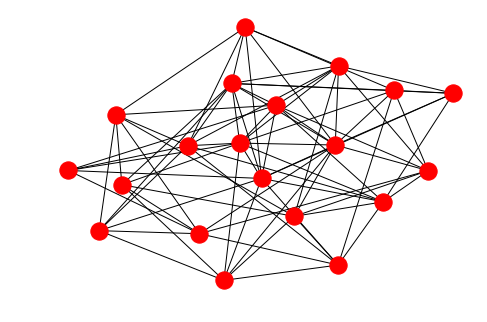

In [8]:
nx.draw(G)

We have a cluster, however this is too densely connected. This is because every pair got assessed twice (e.g. node1 as A, node2 as B; then node 1 as B and node2 as A). Since our graph is undirected, this should not happen. Lets rectify that

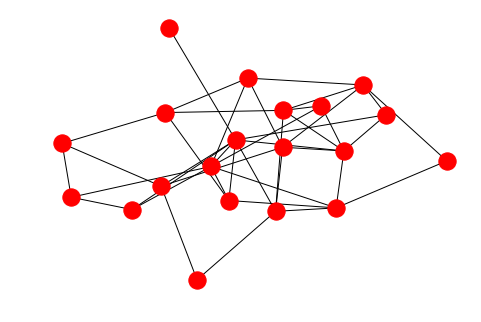

In [16]:
from scipy.stats import bernoulli
N = 20
p = 0.2
#bernoulli.rvs(p=0.2)
G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 > node2 and bernoulli.rvs(p=p):
            G.add_edge(node1,node2)
            
nx.draw(G)

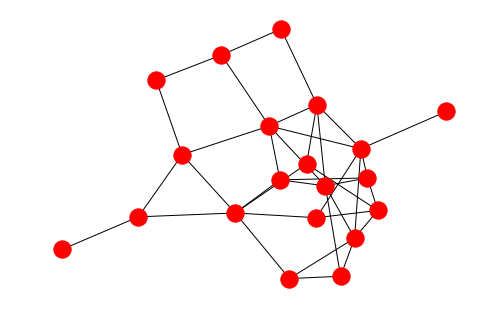

In [15]:
from scipy.stats import bernoulli
N = 20
p = 0.2
#bernoulli.rvs(p=0.2)
G = nx.Graph()
G.add_nodes_from(range(N))
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2 and bernoulli.rvs(p=p):
            G.add_edge(node1,node2)
            
nx.draw(G)

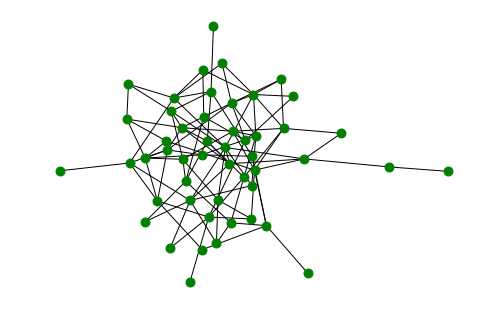

In [28]:
from scipy.stats import bernoulli

def er_graph(N,p):
    """Generate an er graph"""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1 < node2 and bernoulli.rvs(p=p):
                G.add_edge(node1,node2)
    return G

nx.draw(er_graph(50,0.08), node_size=80, node_color="green")

### Plotting the Degree Distribution


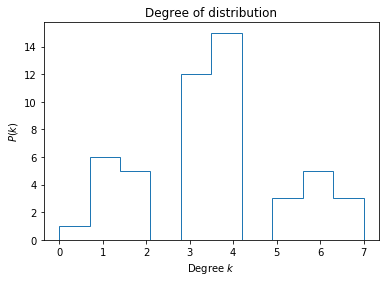

In [44]:
def plot_degree_distribution(G):
    degree_sequence = [d for n, d in G.degree()]
    plt.hist(degree_sequence, histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree of distribution")

G = er_graph(50,0.08)
#nx.draw(G, node_color = "skyblue")
plot_degree_distribution(G)

Since we have smaller number of nodes, there are nodes above that have zero connections and some with 7. There is no clear trend for majority of nodes.

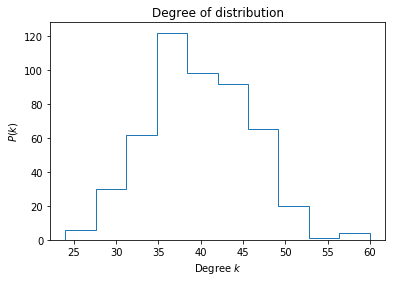

In [45]:
G = er_graph(500,0.08)
#nx.draw(G, node_color = "skyblue")
plot_degree_distribution(G)

With higher number of nodes, the situation improves. There are no nodes with zero connections and majority have 30 to 45 connections

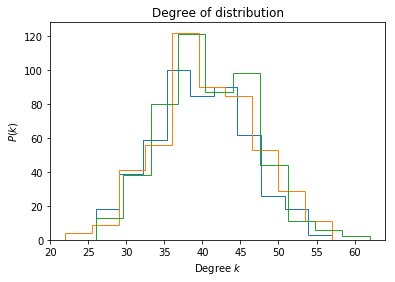

In [46]:
G1 = er_graph(500,0.08)
plot_degree_distribution(G1)

G2 = er_graph(500,0.08)
plot_degree_distribution(G2)

G3 = er_graph(500,0.08)
plot_degree_distribution(G3)

TypeError: '<' not supported between instances of 'dict' and 'float'

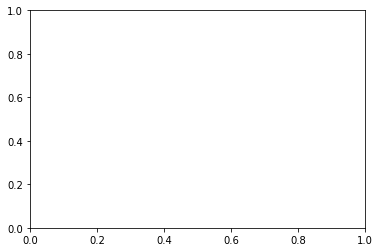

In [47]:
# comprehension check

D = {1:1, 2:2, 3:3}
plt.hist(D)  # code contains an error

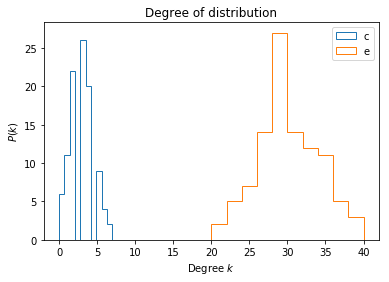

In [49]:
G1 = nx.erdos_renyi_graph(100, 0.03)
plot_degree_distribution(G1)
G2 = nx.erdos_renyi_graph(100, 0.30) 
plot_degree_distribution(G2)
plt.legend("center")

##  Descriptive Statistics of Empirical Social Networks

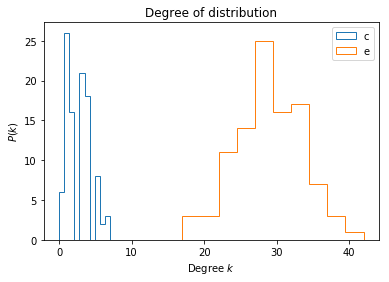

In [50]:
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.03))
plot_degree_distribution(nx.erdos_renyi_graph(100, 0.30))
plt.legend("center")

In [53]:
import numpy as np
A1 = np.loadtxt("files/adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("files/adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


In [56]:
def basic_net_stats(G):
    print("Number of nodes: %d" % G.number_of_nodes())
    print("Number of edges: %f" % G.number_of_edges())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))


In [61]:
print("G1 stats")
basic_net_stats(G1)
print("\nG2 stats")
basic_net_stats(G2)

G1 stats
Number of nodes: 843
Number of edges: 3405.000000
Average degree: 8.08

G2 stats
Number of nodes: 877
Number of edges: 3063.000000
Average degree: 6.99


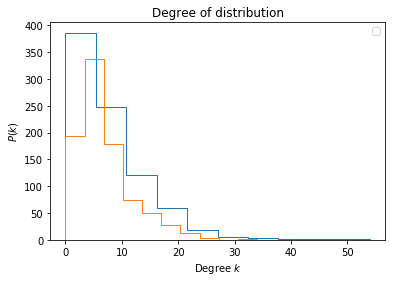

In [69]:
plot_degree_distribution(G1)
plot_degree_distribution(G2)

the degree distributions look quite different from what
we observed for the ER networks.
It seems that most people have relatively few connections,
whereas a small fraction of people have a large number of connections.

#### Finding the Largest Connected Component

Let's now find out how large the largest connected component
is in our two graphs. Note: a single connected component = 
for each pair of nodes in this component,
there exists a set of edges that create a path between them.


Python tells us that this is what's called a generator function.
Generator functions do not return a single object
but instead, they can be used to generate a sequence of objects
using the next method. 

For an iterator object X , X.__next__() returns the next value in X (if it exists)

Python tells us that this is what's called a generator function.
Generator functions do not return a single object
but instead, they can be used to generate a sequence of objects
using the next method.

In [94]:
# the above command is different from the one below where the len function is working with components returned by gen.__next__(), which is walking along the network one component at a time (albiet in a arbitrary order)
len(gen.__next__())
len(gen.__next__())
len(gen.__next__())
len(gen.__next__())
# you will get a `StopIteration` error once all components have been visited (i.e. it has run out of components)

3

3

4

2

In [90]:
gen = nx.connected_component_subgraphs(G1)
g = gen.__next__()

type(g)

networkx.classes.graph.Graph

# Exercise 3

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we define a few dictionaries that enable us to look up the sex, caste, and religion of members of each village by personal ID. For Villages 1 and 2, their personal IDs are stored as pid.


    Define dictionaries with personal IDs as keys and a given covariate for that individual as values. Complete this for the sex, caste, and religion covariates, for Villages 1 and 2.
    For Village 1, store these dictionaries into variables named sex1, caste1, and religion1.
    For Village 2, store these dictionaries into variables named sex2, caste2, and religion2.


In [75]:
len(G1) # gives number on nodes
# same  as 
G1.number_of_nodes()

843

843

Comparing two graphs to determine the largest component

Instead of the iterating through the graph (one component at a time), we could use the max function that can take a generator as input. We just need to tell the max function what number to associate
with each object in the sequence, in this case, number of nodes in a graph.


In [93]:
G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

len(G1_LCC)
len(G2_LCC)

825

810

Computing the proportion of nodes that
lie in the largest connected components for these two graphs i.e. the number of nodes in the largest connected component.

We can get that by dividing the number of nodes in the largest component by the number of nodes in the graph itself

In [98]:
(len(G1_LCC)/len(G1))*100 # 97.9% of all of the nodes of graph G1 are contained in the largest connected component.

(len(G2_LCC)/len(G2))*100

97.86476868327402

92.36031927023946

Lets try visualizing these components !

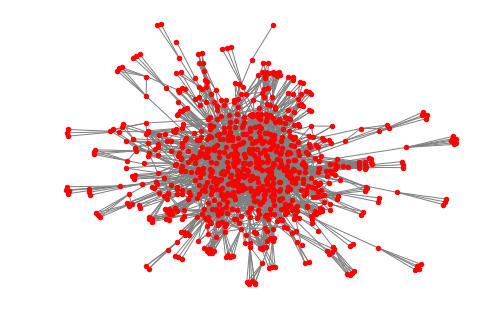

In [101]:
plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20);

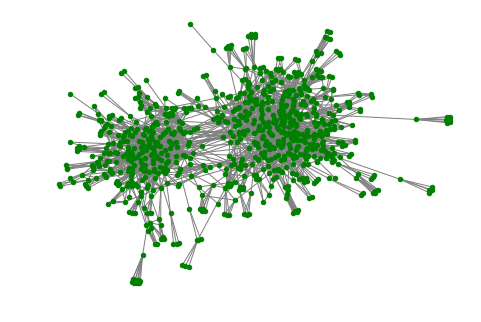

In [100]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20);

# Exercise 1

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we will calculate the chance homophily for an arbitrary characteristic. Homophily is the proportion of edges in the network whose constituent nodes share that characteristic. How much homophily do we expect by chance? If characteristics are distributed completely randomly, the probability that two nodes x and y share characteristic a is the probability both nodes have characteristic a, which is the frequency of a squared. The total probability that nodes x and y share their characteristic is therefore the sum of the frequency of each characteristic in the network. For example, in the dictionary favorite_colors provided, the frequency of red and blue is 1/3 and 2/3 respectively, so the chance homophily is (1/3)^2+(2/3)^2 = 5/9.


    Create a function that takes a dictionary chars with personal IDs as keys and characteristics as values, and returns a dictionary with characteristics as keys, and the frequency of their occurrence as values.
    Create a function chance_homophily(chars) that takes a dictionary chars defined as above and computes the chance homophily for that characteristic.
    A sample of three peoples' favorite colors is given in favorite_colors. Use your function to compute the chance homophily in this group, and store as color_homophily.
    Print color_homophily.

Instructor solution for function `chance_homophily`

In [ ]:
def chance_homophily(chars):
    frequencies = frequency(chars)
    return np.sum(np.square(list(frequencies.values())))

In [102]:
from collections import Counter
def frequency(chars):
    d = {}
    cnt = Counter(chars.values())
    for val in chars.values():
        d[val] = cnt[val]/sum(cnt.values())
    return d   
    
    
def chance_homophily(chars):
    #color_homophily = {}
    char_freq = frequency(chars)
    #color_homophily = {k:v**2 for k,v in char_freq.items()}
    color_homophily = sum([val**2 for val in char_freq.values()])
    return color_homophily


favorite_colors = {
    "ankit":  "red",
    "xiaoyu": "blue",
    "mary":   "blue"
}

color_homophily = chance_homophily(favorite_colors)
print(color_homophily)

0.5555555555555556


# Exercise 2

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In the remaining exercises, we will calculate and compare the actual homophily in these village to chance. In this exercise, we subset the data into individual villages and store them.


    individual_characteristics.dta contains several characteristics for each individual in the dataset such as age, religion, and caste. Use the pandas library to read in and store these characteristics as a dataframe called df.
    Store separate datasets for individuals belonging to Villages 1 and 2 as df1 and df2, respectively.
        Note that some attributes may be missing for some individuals. In this case study, we will ignore rows of data where some column information is missing.
    Use the head method to display the first few entries of df1.


# Exercise 3

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we define a few dictionaries that enable us to look up the sex, caste, and religion of members of each village by personal ID. For Villages 1 and 2, their personal IDs are stored as pid.


    Define dictionaries with personal IDs as keys and a given covariate for that individual as values. Complete this for the sex, caste, and religion covariates, for Villages 1 and 2.
    For Village 1, store these dictionaries into variables named sex1, caste1, and religion1.
    For Village 2, store these dictionaries into variables named sex2, caste2, and religion2.


In [103]:
import pandas as pd
#df  = pd.read_stata(data_filepath + "individual_characteristics.dta")
df  = pd.read_stata("files/individual_characteristics.dta")
#df.village.unique()
df1 = df.loc[df['village'] == 1]
df2 = df.loc[df['village'] == 2]

df1.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1,Yes,1.0,Yes,No,
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


In [105]:
sex1      = dict(zip(df1.pid, df1.resp_gend))
caste1    = dict(zip(df1.pid, df1.caste))
religion1 = dict(zip(df1.pid, df1.religion))

sex2      = dict(zip(df2.pid, df2.resp_gend))
caste2    = dict(zip(df2.pid, df2.caste))
religion2 = dict(zip(df2.pid, df2.religion))

# Exercise 4

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we will print the chance homophily of several characteristics of Villages 1 and 2. The function chance_homophily is still defined from Exercise 1.

sex1, caste1, religion1, sex2, caste2, and religion2 are already defined from previous exercises. Use chance_homophily to compute the chance homophily for sex, caste, and religion In Villages 1 and 2. Is the chance homophily for any attribute very high for either village?

# Exercise 5

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we will create a function that computes the observed homophily given a village and characteristic.

Complete the function homophily(), which takes a network G, a dictionary of characteristics chars, and node IDs IDs. For each node pair, determine whether a tie exists between them, as well as whether they share a characteristic. The total count of these is num_same_ties and num_ties respectively, and their ratio is the homophily of chars in G. Complete the function by choosing where to increment num_same_ties and num_ties.

In [111]:
def homophily(G, chars, IDs):
    """
    Given a network G, a dict of characteristics chars for node IDs,
    and dict of node IDs for each node in the network,
    find the homophily of the network.
    """
    num_same_ties = 0
    num_ties = 0
    for n1, n2 in G.edges():
        if IDs[n1] in chars and IDs[n2] in chars:
            if G.has_edge(n1, n2):
                num_ties += 1
                # Should `num_ties` be incremented?  What about `num_same_ties`?
                if chars[IDs[n1]] == chars[IDs[n2]]:
                    num_same_ties += 1
                    # Should `num_ties` be incremented?  What about `num_same_ties`?
    return (num_same_ties / num_ties)    
    

# Exercise 6

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we will obtain the personal IDs for Villages 1 and 2. These will be used in the next exercise to calculate homophily for these villages.

In this dataset, each individual has a personal ID, or PID, stored in key_vilno_1.csv and key_vilno_2.csv for villages 1 and 2, respectively. data_filepath contains the base URL to the datasets used in this exercise. Use pd.read_csv to read in and store key_vilno_1.csv and key_vilno_2.csv as pid1 and pid2 respectively. The csv files have no headers, so make sure to include the parameter header = None.

In [109]:
data_filepath = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_974/datasets/'
filePath1 = data_filepath+str("key_vilno_1.csv")
filePath2 = data_filepath+str("key_vilno_2.csv")

pid1 = pd.read_csv(filePath1, header=None)
pid2 = pd.read_csv(filePath2, header=None)
#pid2.head()

,0
0,200101
1,200102
2,200103
3,200104
4,200105


# Exercise 7

Network homophily occurs when nodes that share an edge share a characteristic more often than nodes that do not share an edge. In this case study, we will investigate homophily of several characteristics of individuals connected in social networks in rural India.

In this exercise, we will compute the homophily of several network characteristics for Villages 1 and 2, and compare this to chance homophily. The networks for these villages have been stored as networkx graph objects G1 and G2. homophily() and chance_homophily() are pre-loaded from previous exercises.


    Use your homophily() function to compute the observed homophily for sex, caste, and religion in Villages 1 and 2. Print all six values.
    Use the chance_homophily() to compare these values to chance homophily. Are these values higher or lower than that expected by chance?


In [53]:
import numpy as np
A1 = np.loadtxt("files/adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("files/adj_allVillageRelationships_vilno_2.csv", delimiter=",")

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)


In [116]:
data_filepath = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_974/datasets/'
filePath1 = data_filepath+str("key_vilno_1.csv")
filePath2 = data_filepath+str("key_vilno_2.csv")

# got TypeError - Series objects are mutable and cannot be hashed, when using pid as is. Had to change the type of the read lists for the exercise to work like on datacamp
pid1 = dict(pd.read_csv(filePath1, header=None)[0])
pid2 = dict(pd.read_csv(filePath2, header=None)[0])
#pid2.head()

In [117]:
print("Village 1 observed proportion of same sex:", homophily(G1, sex1, pid1))
print("Village 1 observed proportion of same caste:", homophily(G1, caste1, pid1))
print("Village 1 observed proportion of same religion:", homophily(G1, religion1, pid1))

print("Village 2 observed proportion of same sex:", homophily(G2, sex2, pid2))
print("Village 2 observed proportion of same caste:", homophily(G2, caste2, pid2))
print("Village 2 observed proportion of same religion:", homophily(G2, religion2, pid2))

# chance homophily requires dictionary as input

print("Village 1 chance homophily of same sex:", chance_homophily(sex1))
print("Village 1 chance homophily of same caste:", chance_homophily(caste1))
print("Village 1 chance homophily of same religion:", chance_homophily(religion1))

print("Village 2 chance homophily of same sex:", chance_homophily(sex2))
print("Village 2 chance homophily of same caste:", chance_homophily(caste2))
print("Village 2 chance homophily of same religion:", chance_homophily(religion2))


Village 1 observed proportion of same sex: 0.5908629441624366
Village 1 observed proportion of same caste: 0.7959390862944162
Village 1 observed proportion of same religion: 0.9908629441624366
Village 2 observed proportion of same sex: 0.5658073270013568
Village 2 observed proportion of same caste: 0.8276797829036635
Village 2 observed proportion of same religion: 1.0
Village 1 chance homophily of same sex: 0.5027299861680701
Village 1 chance homophily of same caste: 0.6741488509791551
Village 1 chance homophily of same religion: 0.9804896988521925
Village 2 chance homophily of same sex: 0.5005945303210464
Village 2 chance homophily of same caste: 0.425368244800893
Village 2 chance homophily of same religion: 1.0


In each case, observed proportions are substantially higher than chance. This concludes the case study. 

In [94]:
# the above command is different from the one below where the len function is working with components returned by gen.__next__(), which is walking along the network one component at a time (albiet in a arbitrary order)
len(gen.__next__())
len(gen.__next__())
len(gen.__next__())
len(gen.__next__())
# you will get a `StopIteration` error once all components have been visited (i.e. it has run out of components)

3

3

4

2